In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving 27_B_17834.csv to 27_B_17834 (1).csv


Закгружаем данные в датафрейм

In [ ]:
df = pd.read_csv('27_B_17834.csv', sep=';')
df['X'] = df['X'].str.replace(',', '.').astype(float)
df['Y'] = df['Y'].str.replace(',', '.').astype(float)
print(df)

          X      Y
0     7.084  7.959
1    -0.759  5.781
2     6.736  4.640
3     7.899  7.361
4     0.297  5.932
...     ...    ...
9895  5.910 -1.384
9896  2.601  0.671
9897 -0.361  5.778
9898  7.805  6.691
9899  2.113  6.230

[9900 rows x 2 columns]


Переформатируем в массив numpy

In [ ]:
numeric_data = df.to_numpy()
print(numeric_data)

[[ 7.084  7.959]
 [-0.759  5.781]
 [ 6.736  4.64 ]
 ...
 [-0.361  5.778]
 [ 7.805  6.691]
 [ 2.113  6.23 ]]


Посмотрим как выглядят кластеры

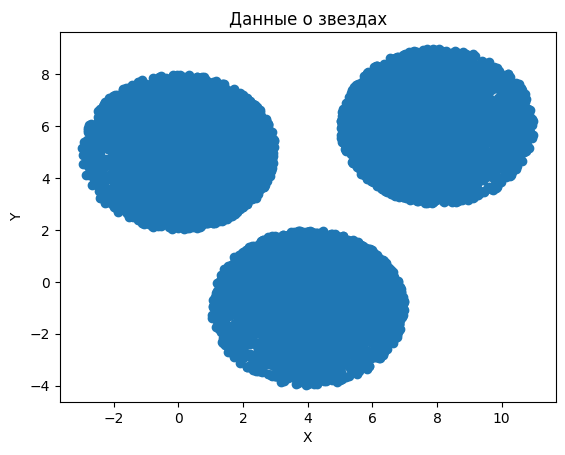

In [ ]:
plt.scatter(numeric_data[:, 0], numeric_data[:, 1])
plt.title("Данные о звездах")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Проводим кластеризацию методом k-средних, по умолчанию KMeans использует Евклидово пространство, что соответствует заданию.
В labels лежат метки, описывающие принадлежность точки к определенному кластеру (целые числа: [0, 1, 2] для 3 кластеров), чтобы на графике распределить кластеры по цветам.
В centroids записываем координаты центров кластеров.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(numeric_data)

labels = kmeans.labels_ # Массив меток кластеров
centroids = kmeans.cluster_centers_ # Центры кластеров

Проверим корректность найденных центров, построив график

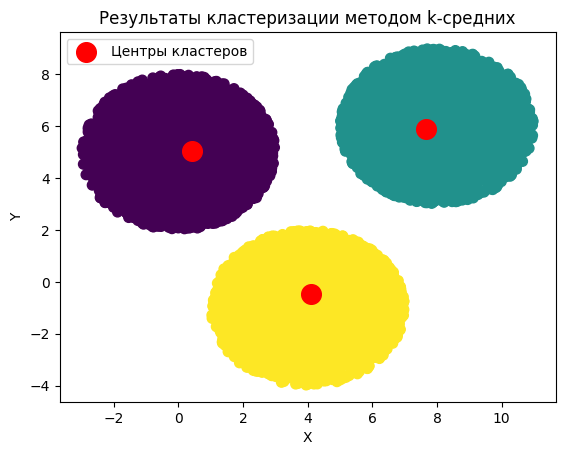

In [ ]:
plt.scatter(numeric_data[:, 0], numeric_data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Центры кластеров')
plt.title("Результаты кластеризации методом k-средних")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Выглядит похоже на правду, выводим координаты

In [ ]:
print(f"Первый кластер: ({centroids[0, 0]:.2f} ; {centroids[0, 1]:.2f})")
print(f"Второй кластер: ({centroids[1, 0]:.2f} ; {centroids[1, 1]:.2f})")
print(f"Третий кластер: ({centroids[2, 0]:.2f} ; {centroids[2, 1]:.2f})")

Первый кластер: (0.43 ; 5.02)
Второй кластер: (7.65 ; 5.88)
Третий кластер: (4.11 ; -0.49)
